# Linear regression in diabetes dataset

Exploremos los conjuntos de datos incluidos en esta biblioteca de Python. Estos conjuntos de datos se han limpiado y formateado para su uso en algoritmos de ML.

## Ej 1: Carga y explora el dataset diabetes de sklearn 

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [5]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## A partir de la descripción de los datos, responda a las siguientes preguntas:

1. ¿Cuántos atributos hay en los datos? ¿Qué significan?

1. ¿Cuál es la relación entre `diabetes['data']` y `diabetes['target']`?

1. ¿Cuántos registros hay en los datos?


## Ahora explora lo que contiene la parte *data* así como la parte *target* de `diabetes`. 

Scikit-learn normalmente toma arrays numpy 2D como entrada (aunque también se aceptan dataframes pandas). Inspeccione la forma de `data` y `target`. Confirme que son consistentes con la descripción de los datos.

## Realiza un EDA de los datos

In [6]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [7]:
X = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
y = pd.DataFrame(diabetes["target"], columns=["target"])

In [8]:
X

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1   -0.039493 -0.068332 -0.092204  
2   -0.002592  0.002861 -0.025930  
3    0.034309  0.022688 -0.009362  
4   -0.002592 -0.031988 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018114  0.044485  
439 -0.011080 -0.046883  0.015491  
440  0.026560  0.044529 -0.025930  
441 -0.039493 -0.004222  0.003064  

[442 rows x 10 columns]

In [9]:
y

target
0     151.0
1      75.0
2     141.0
3     206.0
4     135.0
..      ...
437   178.0
438   104.0
439   132.0
440   220.0
441    57.0

[442 rows x 1 columns]

In [10]:
X.shape, y.shape

((442, 10), (442, 1))

In [11]:
df = pd.concat([X, y], axis=1)
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

In [12]:
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

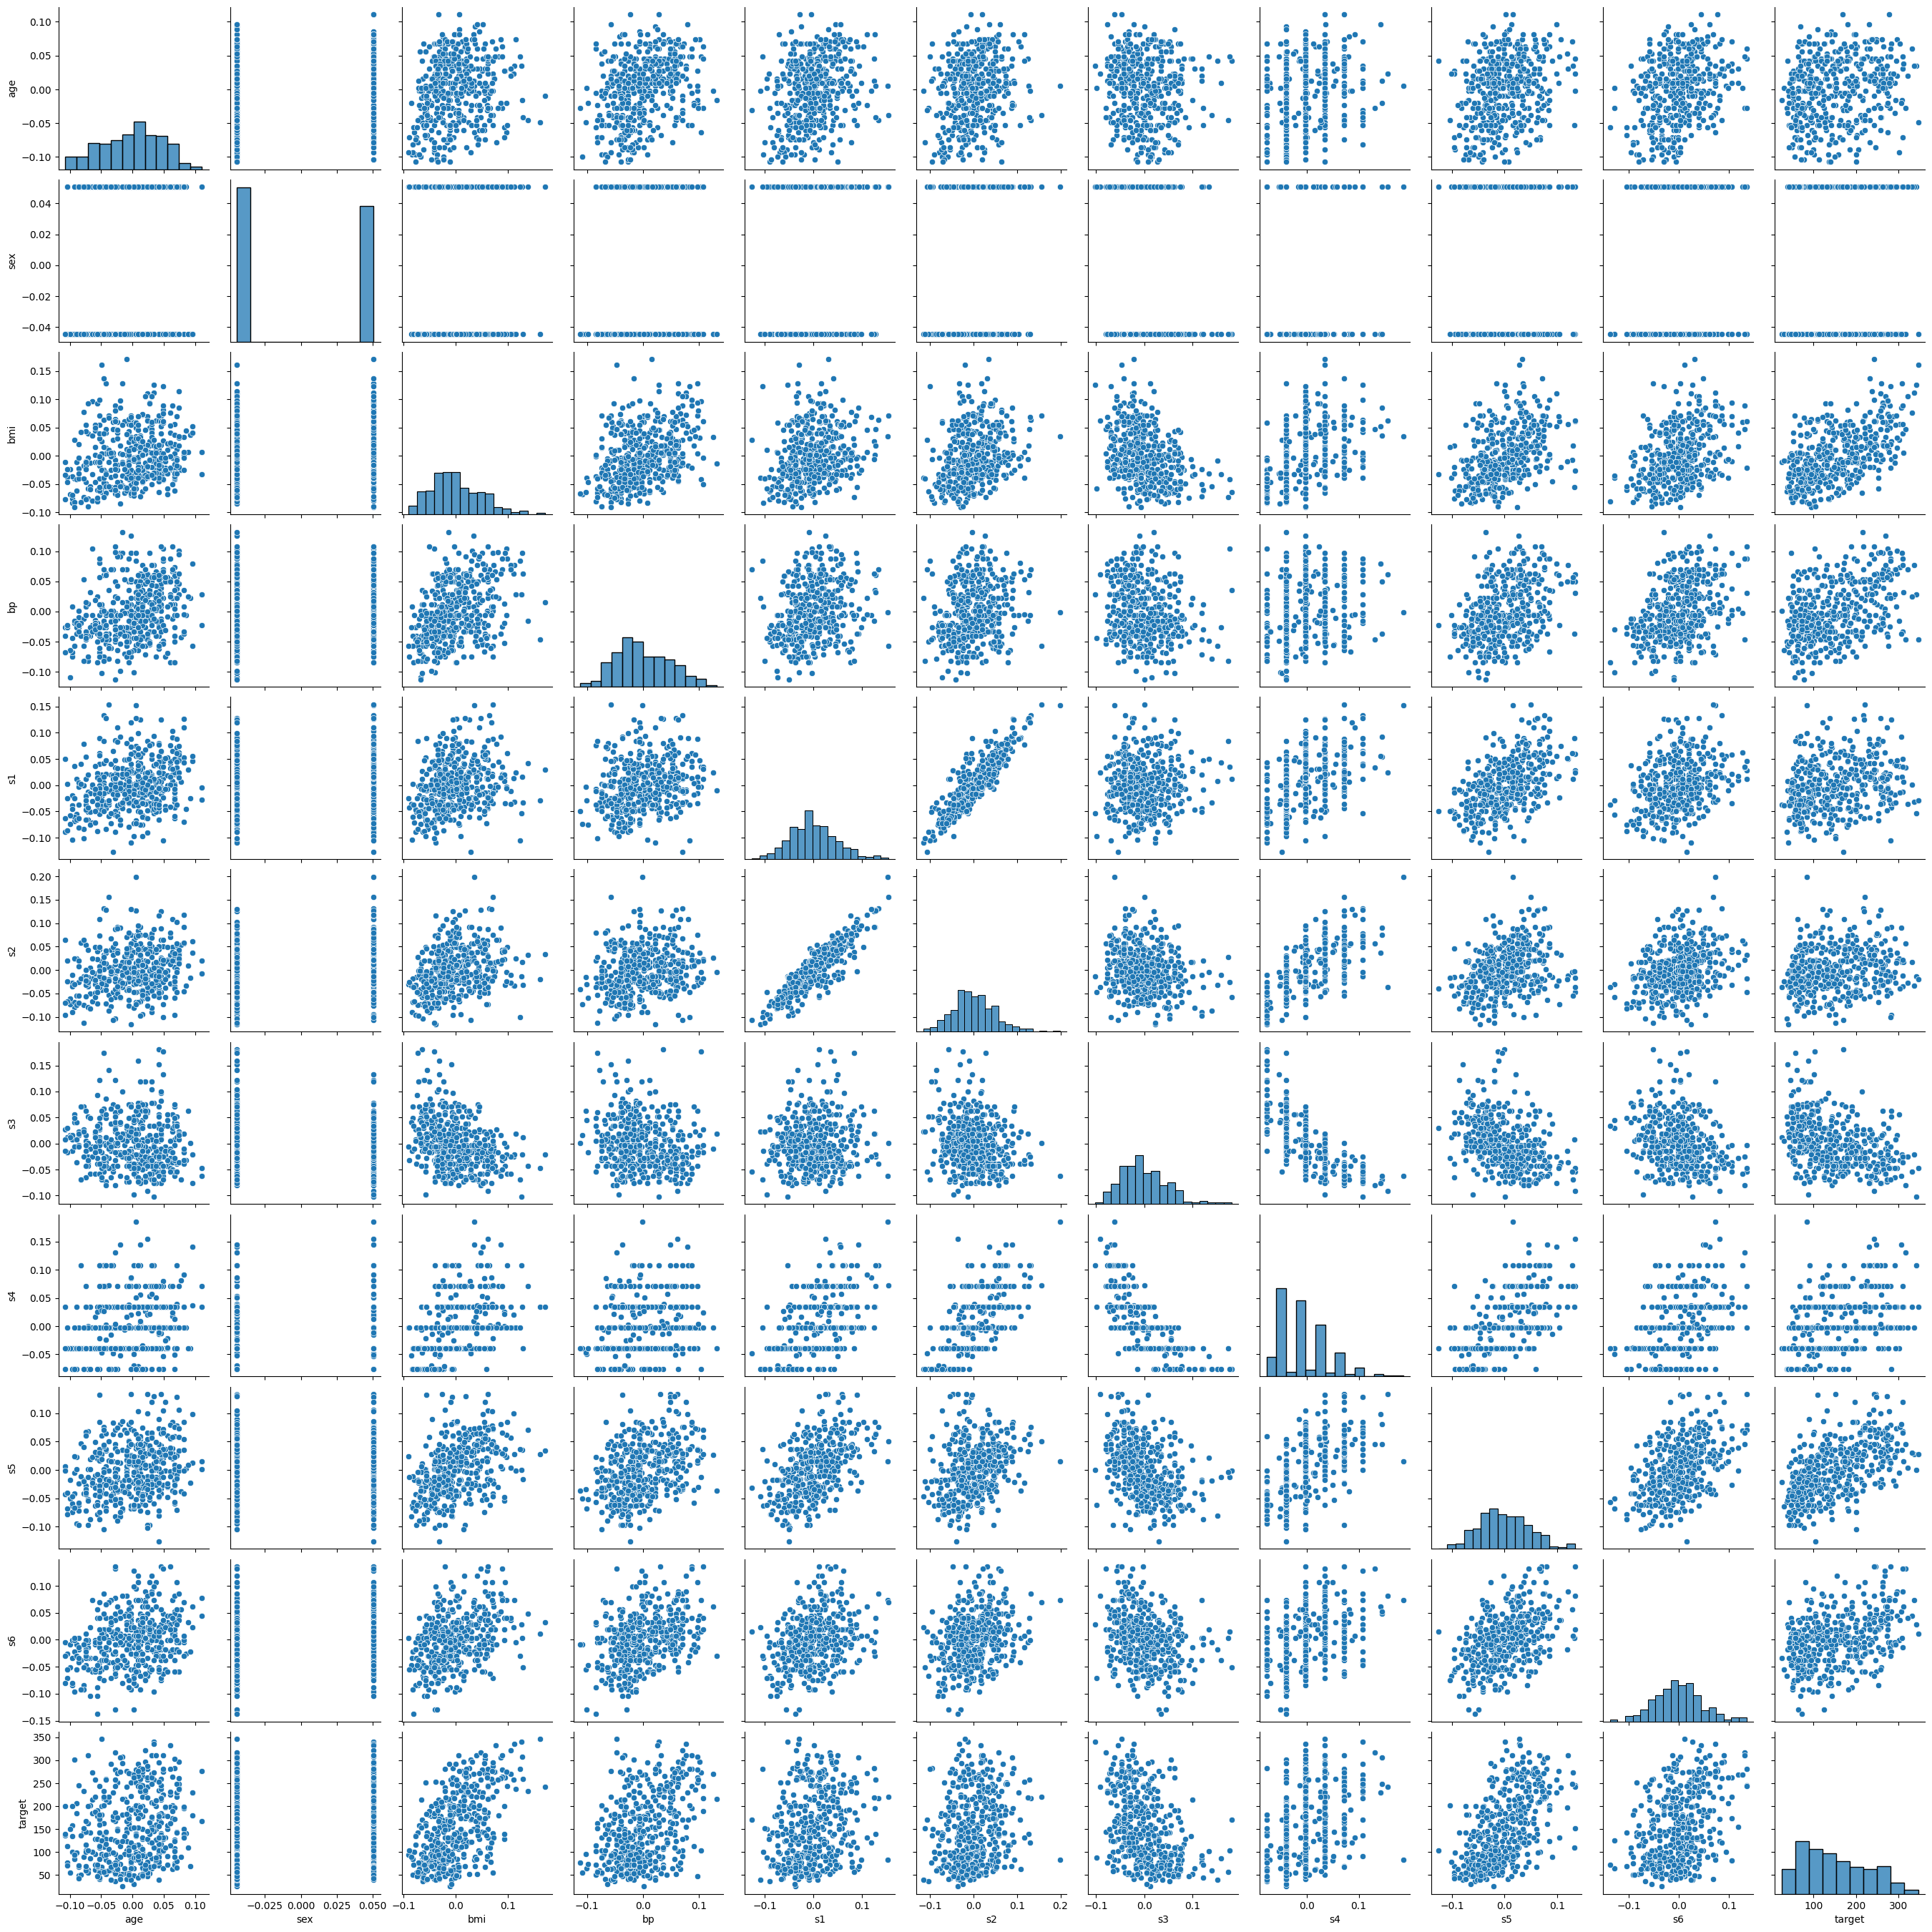

In [13]:
import seaborn as sns

sns.pairplot(df)

In [14]:
df.corr()

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6    target  
age     0.203841  0.270774  0.301731  0.187889  
sex     0.332115  0.149916  0.208133  0.043062  
bmi     0.413807  0.446157  0.388680  0.586450  
bp      0.257650  0.393480  0.390430  0.441482  
s1      0.542207  0.515503  0.325717  0.212022  
s2      0.659817  0.318357  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617859  0.417212  0.430453  
s5      0.617859  1.000000  0.464669  0.565883  
s6      0.417212  0.464669  1.000000  0.382483  
target  0.430453  0.565883  0.382483  1.000000

<AxesSubplot: >

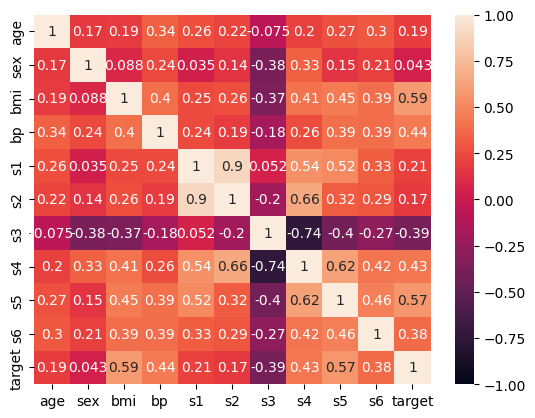

In [15]:
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True)

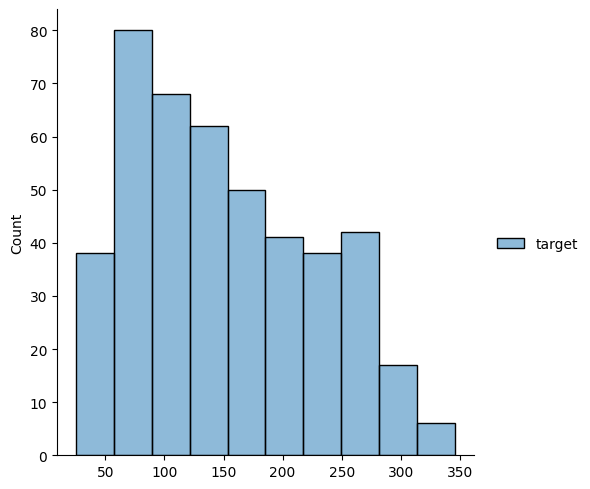

In [16]:
sns.displot(y)

In [17]:
y.describe()

target
count  442.000000
mean   152.133484
std     77.093005
min     25.000000
25%     87.000000
50%    140.500000
75%    211.500000
max    346.000000

## Construye un modelo 

1. Crea un modelo de regresión lineal.
2. Parte los datos en conjuntos de entrenamiento y test. Usa las ultimas 20 filas para los datos de test.
3. Entrena el modelo. Muestra los parametros del modelo.
4. Realiza una predicción con los datos de test

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

# Si queremos sacarlos en orden podemos hacerlo así o con
# train_test_split y shuffle=False

# X_train, X_test = X.iloc[:-20], X.iloc[-20:]
# print(X.shape, X_train.shape, X_test.shape)

# y_train, y_test = y.iloc[:-20], y.iloc[-20:]
# print(y.shape, y_train.shape, y_test.shape)

# Extraemos una muestra aleatoria de 20 para el test

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=20, 
                                                    shuffle=True, 
                                                    random_state=0)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(442, 10) (422, 10) (20, 10)
(442, 1) (422, 1) (20, 1)


In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.coef_, model.intercept_

(array([[ -32.30360126, -257.44019182,  513.32582416,  338.46035389,
         -766.84661714,  455.83564292,   92.5514199 ,  184.75080624,
          734.91009007,   82.72479583]]),
 array([152.39185361]))

<BarContainer object of 10 artists>

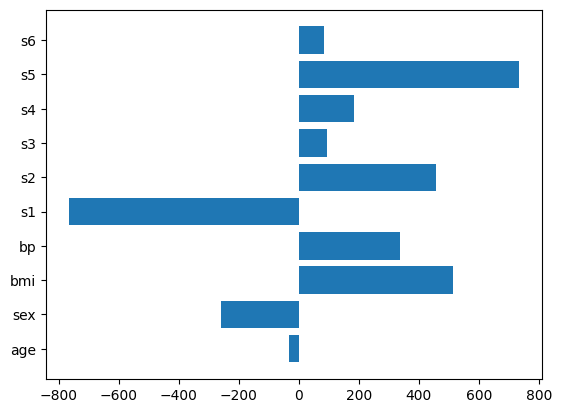

In [21]:
import matplotlib.pyplot as plt

plt.barh(y=X_train.columns, width=model.coef_.reshape(-1))

<AxesSubplot: >

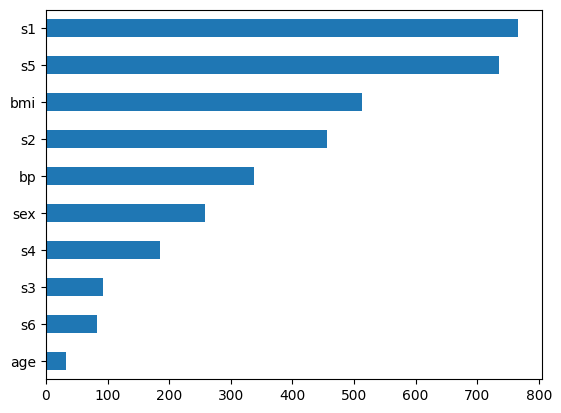

In [22]:
df_coefs = pd.DataFrame(model.coef_, columns=X_train.columns).T
df_coefs.columns = ["coefs"]
df_coefs["coefs_abs"] = df_coefs.abs()
df_coefs.sort_values(by="coefs_abs")["coefs_abs"].plot(kind="barh")

<BarContainer object of 10 artists>

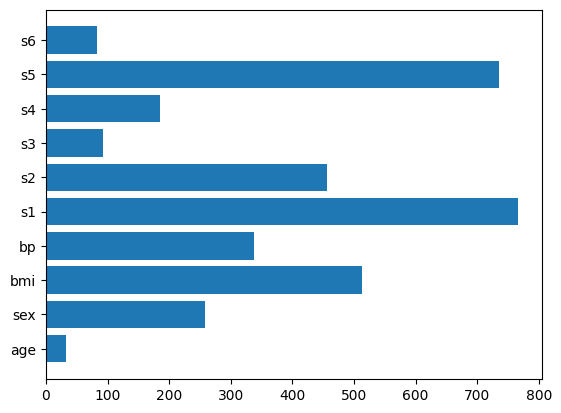

In [23]:
import matplotlib.pyplot as plt

plt.barh(y=X_train.columns, width=np.abs(model.coef_.reshape(-1)))

##  Pinta las predicciones y comparalas con los datos de test

In [24]:
y_hat = model.predict(X_test)
y_hat

array([[234.91095893],
       [246.81176987],
       [163.46432565],
       [120.06230218],
       [189.54050856],
       [252.2514418 ],
       [115.08199144],
       [187.68547408],
       [143.45901005],
       [229.33113887],
       [165.99156204],
       [177.21027087],
       [104.8044094 ],
       [ 87.81908296],
       [244.00101612],
       [ 87.31729351],
       [158.46041507],
       [ 68.10031077],
       [100.24635765],
       [225.64965435]])

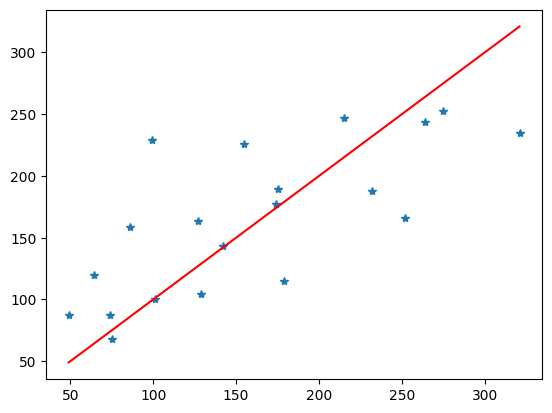

In [25]:
x = np.linspace(y_test.min(), y_test.max())
plt.plot(y_test, y_hat, "*")
plt.plot(x, x, "r")

## Calcula y visualiza los errores

array([[<AxesSubplot: title={'center': 'target'}>]], dtype=object)

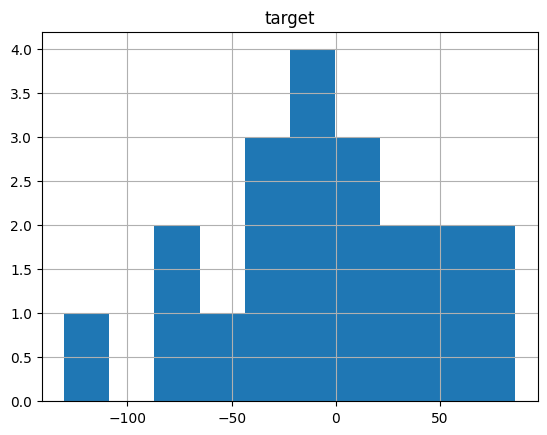

In [26]:
res = y_test - y_hat
res.hist(bins=10)

In [27]:
res.describe()

target
count   20.000000
mean    -5.709965
std     54.460414
min   -130.331139
25%    -36.927568
50%     -2.334640
75%     23.110316
max     86.089041

In [28]:
def metrics(y_real, y_pred):
    res = y_real - y_pred

    mse = np.mean(res ** 2, axis=0).values

    rmse = np.sqrt(mse)
    print("RMSE:", rmse[0])

    mae = np.mean(np.abs(res), axis=0)
    print("MAE:", mae[0])

    r_2 = 1 - mse / np.var(y_real)
    print(r_2)

In [29]:
X_train

age       sex       bmi        bp        s1        s2        s3  \
76  -0.030942  0.050680  0.028284  0.070072 -0.126781 -0.106845 -0.054446   
37  -0.009147 -0.044642  0.011039 -0.057313 -0.024960 -0.042963  0.030232   
388  0.052606  0.050680 -0.024529  0.056301 -0.007073 -0.005072 -0.021311   
411  0.005383 -0.044642  0.058463 -0.043542 -0.073119 -0.072399  0.019187   
289 -0.074533  0.050680  0.055229 -0.040099  0.053469  0.053174 -0.043401   
..        ...       ...       ...       ...       ...       ...       ...   
323  0.070769  0.050680 -0.007284  0.049415  0.060349 -0.004445 -0.054446   
192  0.056239  0.050680 -0.030996  0.008101  0.019070  0.021233  0.033914   
117  0.059871 -0.044642 -0.021295  0.087287  0.045213  0.031567 -0.047082   
47  -0.078165 -0.044642 -0.073030 -0.057313 -0.084126 -0.074277 -0.024993   
172  0.041708  0.050680  0.071397  0.008101  0.038334  0.015909 -0.017629   

           s4        s5        s6  
76  -0.047981 -0.030748  0.015491  
37  -0.039493  0.017036 -0.005220  
388 -0.002592  0.026717 -0.038357  
411 -0.076395 -0.051404 -0.025930  
289  0.071210  0.061238 -0.034215  
..        ...       ...       ...  
323  0.108111  0.129021  0.056912  
192 -0.039493 -0.029526 -0.059067  
117  0.071210  0.079122  0.135612  
47  -0.039493 -0.018114 -0.083920  
172  0.034309  0.073407  0.085907  

[422 rows x 10 columns]

In [35]:
cols_to_drop = ["age", "s2", "s3", "s4"]

X_train_2 = X_train.copy()
X_train_2.drop(columns=cols_to_drop, inplace=True)

X_test_2 = X_test.copy()
X_test_2.drop(columns=cols_to_drop, inplace=True)

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)

y_hat_2 = model_2.predict(X_test_2)

metrics(y_test, y_hat_2)

RMSE: 52.412635877317236
MAE: 40.03980597903561
target    0.536923
dtype: float64


In [89]:
mse = np.mean(res ** 2, axis=0).values
print("MSE:", mse[0])

rmse = np.sqrt(mse)
print("RMSE:", rmse[0])

mae = np.mean(np.abs(res), axis=0)
print("MAE:", mae[0])

from sklearn.metrics import r2_score
r_2 = r2_score(y_test, y_hat)
print(r_2)

r_2 = 1 - mse / np.var(y_test)
print(r_2)

r_2 = np.corrcoef(y_hat.squeeze(), y_test.values.squeeze())[0, 1] ** 2
print(r_2)

MSE: 2850.2435792863425
RMSE: 53.38767254045022
MAE: 41.20261248523318
0.5195333332288743
target    0.519533
dtype: float64
0.5263023918261146


In [59]:
y_hat.squeeze()

array([234.91095893, 246.81176987, 163.46432565, 120.06230218,
       189.54050856, 252.2514418 , 115.08199144, 187.68547408,
       143.45901005, 229.33113887, 165.99156204, 177.21027087,
       104.8044094 ,  87.81908296, 244.00101612,  87.31729351,
       158.46041507,  68.10031077, 100.24635765, 225.64965435])

In [62]:
y_test.values.squeeze()

array([321., 215., 127.,  64., 175., 275., 179., 232., 142.,  99., 252.,
       174., 129.,  74., 264.,  49.,  86.,  75., 101., 155.])

In [66]:
corr_sol = np.corrcoef(y_hat.squeeze(), y_test.values.squeeze())
corr_sol = corr_sol[0, 1]
corr_sol

0.7254670163598856

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.5195333332288743

In [67]:
r_2 = corr_sol ** 2
r_2

0.5263023918261146

In [81]:
var_y = np.mean((y_test - y_test.mean())**2).values[0]
var_y

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


5932.24

In [82]:
cuasivar_y = 1 / (y_test.shape[0] - 1) * np.sum((y_test - y_test.mean())**2)
cuasivar_y

target    6244.463158
dtype: float64

In [76]:
np.var(y)

target    5929.884897
dtype: float64

In [84]:
r_2 = 1 - mse / var_y
r_2

array([0.51953333])